In [92]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import LogStretch, MinMaxInterval, ImageNormalize
from astropy.wcs import WCS
from photutils import DAOStarFinder
from astropy.stats import sigma_clipped_stats
import scipy.stats as stats
from scipy.optimize import curve_fit




data_file = 'ic2r02050_drz.fits'

In [23]:

with fits.open(data_file) as hdulist:
    data = hdulist[1].data

    # subtract mean, and remove nans
    nanmean = np.nanmean(data)
    data = data
    data[np.isnan(data)] = np.zeros(np.shape(data))[np.isnan(data)]
    header =  hdulist[1].header
    wcs = WCS(header)


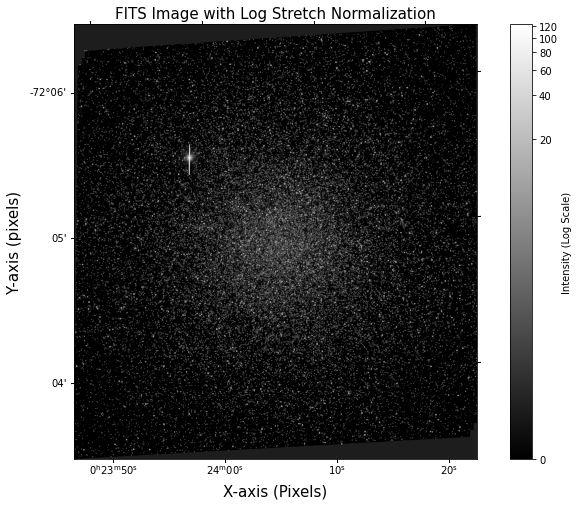

In [66]:
# Create a LogStretch normalization with MinMaxInterval
stretch = LogStretch()
interval = MinMaxInterval()
norm = ImageNormalize(data, interval=interval, stretch=stretch, vmin=0)


fig = plt.figure(figsize=(12, 8))
plt.subplot(projection=wcs,)
#plt.figure(figsize=(8,8))
plt.imshow(data + nanmean, origin='lower', cmap='gray', norm=norm, ) # aspect='auto')

# Add colorbar
plt.colorbar(label='Intensity (Log Scale)')

# Add labels and title (customize as needed)

plt.xlabel('X-axis (Pixels)',size=15)
plt.ylabel('Y-axis (pixels)', size=15)
plt.title('FITS Image with Log Stretch Normalization', size=15)
# Set axis to be equal (force the plot to be square)
#plt.axis('equal')

# Show the plot
plt.show()

In [147]:
mean, median, std = sigma_clipped_stats(data, sigma=5.0)

daofinder = DAOStarFinder(
    fwhm=3,                 # FWHM of the stars in your image (adjust as needed)
    threshold=(10* std) + nanmean,      # Adjust the threshold as needed
    exclude_border=True       # Exclude sources near the image border
)

sources = daofinder.find_stars(data)

In [148]:
# Get x and y centroids of the detected stars
x_centroids = sources['xcentroid']
y_centroids = sources['ycentroid']

# plot
fig = plt.figure(figsize=(12, 8), dpi=300)
plt.subplot(projection=wcs,)
#plt.figure(figsize=(8,8))
plt.imshow(data, origin='lower', cmap='gray', norm=norm,) # aspect='auto')

# Add colorbar
plt.colorbar(label='Mean Subtracted Intensity (Log Scale)')

# Add labels and title (customize as needed)

plt.xlabel('X-axis (Pixels)',size=15)
plt.ylabel('Y-axis (pixels)', size=15)
plt.title('FITS Image with Log Stretch Normalization', size=15)
# Set axis to be equal (force the plot to be square)
#plt.axis('equal')

#plt.scatter(x_centroids, y_centroids, marker='x', color='blue', s=30, alpha = 0.5)
plt.savefig('hail_sagan.pdf')


# Show the plot
plt.close()


Text(0.5, 0, 'X Pixel Position')

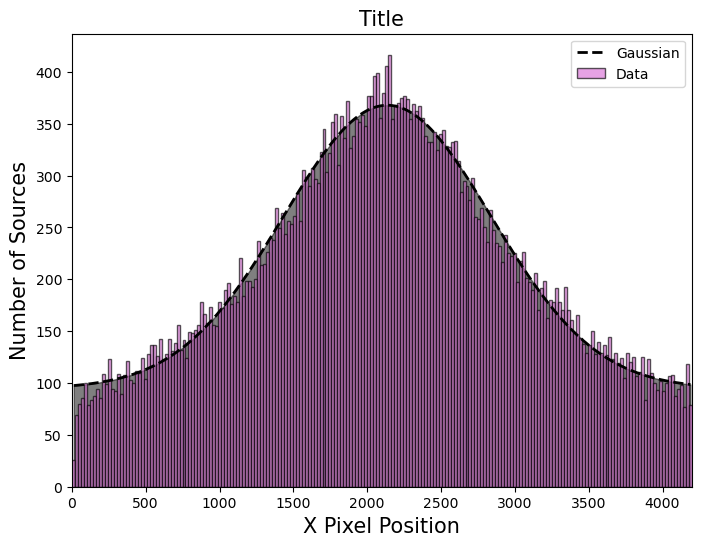

In [149]:
# Compute the histogram using np.histogram
fig = plt.figure(figsize=(8, 6), dpi=100)
hist, bins = np.histogram(x_centroids, bins=int(np.sqrt(len(x_centroids))))  # Adjust the number of bins as needed

# Compute bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Create the histogram plot directly



# fit gaussian 
p0 = [np.max(hist), np.mean(bin_centers), np.std(hist), np.min(hist)]
params, covariance = curve_fit(gaussian, xdata=bin_centers, ydata=hist, p0=p0)

# Extract the fitted parameters & plot
amplitude_fit, mean_fit, stddev_fit,c  = params

plt.fill_between(bin_centers, gaussian(bin_centers, amplitude_fit, mean_fit, stddev_fit, c), alpha=0.5,  color='k',)
plt.bar(bin_centers, hist, width=np.diff(bins), edgecolor='k', alpha=0.65, color='orchid',label='Data',zorder=1,)
plt.plot(bin_centers, gaussian(bin_centers, amplitude_fit, mean_fit, stddev_fit, c), linestyle='--',  color='k', label='Gaussian', zorder=1, linewidth=2)




plt.xlim(0,np.max(x_centroids))
plt.legend()
plt.title('Title', size=15)
plt.ylabel('Number of Sources', size=15)
plt.xlabel('X Pixel Position', size=15)



Text(0.5, 0, 'Y Pixel Position')

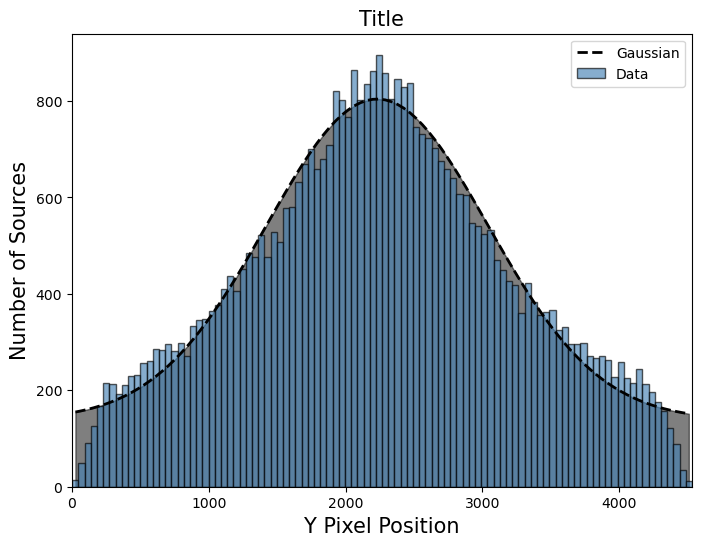

In [156]:
# Compute the histogram using np.histogram
fig = plt.figure(figsize=(8, 6), dpi=100)
hist, bins = np.histogram(y_centroids, bins=100)  # Adjust the number of bins as needed

# Compute bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Create the histogram plot directly

# fit gaussian 
p0 = [np.max(hist), np.mean(bin_centers), np.std(hist), np.min(hist)]
params, covariance = curve_fit(gaussian, xdata=bin_centers, ydata=hist, p0=p0)

# Extract the fitted parameters & plot
amplitude_fit, mean_fit, stddev_fit,c  = params
plt.fill_between(bin_centers, gaussian(bin_centers, amplitude_fit, mean_fit, stddev_fit, c), alpha=0.5,  color='k',)
plt.bar(bin_centers, hist, width=np.diff(bins), edgecolor='k', alpha=0.65, color='steelblue',label='Data',zorder=1)
plt.plot(bin_centers, gaussian(bin_centers, amplitude_fit, mean_fit, stddev_fit, c), linestyle='--',  color='k', label='Gaussian', zorder=1, linewidth=2)






plt.xlim(0,np.max(y_centroids))
plt.legend()
plt.title('Title', size=15)
plt.ylabel('Number of Sources', size=15)
plt.xlabel('Y Pixel Position', size=15)



In [118]:
# Define the Gaussian function
def gaussian(x, amplitude, mean, stddev, c):
    return (amplitude * np.exp(-((x - mean)**2 / (2 * stddev ** 2)))) +c


In [146]:
len(x_centroids)

25807

In [154]:
int(np.sqrt(len(y_centroids)))

208